#**Indian Water Quality Analysis Assignment**
#Written By: Saadaq Abdullahi

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [ ]:

df = pd.read_csv('water_quality_data2.csv')
df=df.rename(columns={'STATION CODE':'STATION_CODE','NITRATENAN N+ NITRITENAN':'NITRATE_LEVEL', 'FECAL COLIFORM':'FECAL_COLIFORM','TOTAL COLIFORM':'TOTAL_COLIFORM'})
df.head(15)

,STATION_CODE,LOCATIONS,STATE,TEMP,D.O.,PH,CONDUCTIVITY,B.O.D,NITRATE_LEVEL,FECAL_COLIFORM,TOTAL_COLIFORM,YEAR
0,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2.0,0.2,4953,8391,2014
1,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
2,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
3,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
4,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81,1.5,0.1,2853,4049,2014
5,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.2,6.1,6.7,308,1.4,0.3,3355,5672,2014
6,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,29.6,6.4,6.7,414,1.0,0.2,6073,9423,2014
7,3186,RIVER MANDOVI AT IFFI JETTY,GOA,30.0,6.4,7.6,305,2.2,0.1,3478,4990,2014
8,3187,RIVER MANDOVI NEAR HOTEL MARRIOT,GOA,30.1,6.3,7.6,77,2.3,0.1,2606,4301,2014
9,1543,"RIVER KALNA AT CHANDELNAN PERNEM, GOA",GOA,27.8,7.1,7.1,176,1.2,0.1,4573,7817,2014


**According to the Minnesota Department of Health, natural processes can cause low levels of nitrate in drinking water—usually less than 3 mg/L. Thus any level of nitrate above 3 mg/L displays evidence of pollution through human activity.**

In [ ]:
df1 = df[["LOCATIONS","STATE","NITRATE_LEVEL"]]
df_pollution_nitrate = df1.loc[df['NITRATE_LEVEL']>3]
df_pollution_nitrate


,LOCATIONS,STATE,NITRATE_LEVEL
130,"KALI AT D/S WEST COAST PAPER MILL, KARNATAKA",KARNATAKA,3.40
158,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,4.30
159,GHAGGAR AT 100M D/S CONF. WITH R. SARASWATI (P...,PUNJAB,3.60
160,"GHAGGAR NEAR BANKARPUR,DERA BASSI,PUNJAB",PUNJAB,5.00
161,"GHAGGAR AT RATANHERI, D/S OF PATIALA NADI (AFT...",PUNJAB,5.90
...,...,...,...
864,"GHAGGAR AT MOONAK, PUNJAB",PUNJAB,15.80
865,GHAGGAR AT D/S SARDULGARH,PUNJAB,12.15
866,GHAGGAR AT U/S SARDULGARH,PUNJAB,8.30
885,"DAMANGANGA AT ZARI CAUSE WAY BRIDGE, DAMAN",DAMAN & DIU,18.73


In [ ]:
groups_pollution = df_pollution_nitrate.groupby("STATE", sort=True)['NITRATE_LEVEL'].count()
groups_pollution

STATE
DAMAN & DIU                        1
DAMAN, DIU, DADRA NAGAR HAVELI     1
GUJARAT                            4
HARYANA                            3
HIMACHAL PRADESH                   1
KARNATAKA                          1
KERALA                             3
MAHARASHTRA                       12
MEGHALAYA                         61
MIZORAM                            1
PUNJAB                            46
TAMILNADU                          1
Name: NITRATE_LEVEL, dtype: int64

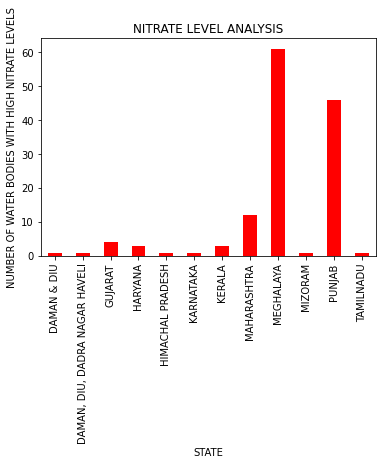

In [ ]:
bar_graph1=groups_pollution.plot(kind='bar',title='NITRATE LEVEL ANALYSIS',xlabel='STATE',ylabel='NUMBER OF WATER BODIES WITH HIGH NITRATE LEVELS',color='red')

**Another way of analyzing pollution in the water bodies is to further assess the level of fecal coliform in the waters. The presence of fecal coliform bacteria in aquatic environments indicates that the water has been contaminated with the fecal material of man or other animals.  Thus encroachment of the aquatic habitat by man can be analyzed through this parameter**

**Since all the bodies of water contain fecal coliform levels, we can determine which body of water has the highest level of fecal coliform and analyze its growth over a period of time**

In [ ]:
df2 = df[["LOCATIONS","STATE","FECAL_COLIFORM","YEAR"]]
location_of_max_fecal = df2.loc[df2["FECAL_COLIFORM"] == df2["FECAL_COLIFORM"].max(), "LOCATIONS"]
fecal_levels_over_years = df2.loc[df2["LOCATIONS"].isin(location_of_max_fecal)]
fecal_levels_over_years

,LOCATIONS,STATE,FECAL_COLIFORM,YEAR
157,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT",TAMILNADU,272521616,2014
394,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT",TAMILNADU,148825783,2013
638,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT",TAMILNADU,180000000,2012


In [ ]:
mean_fecal_level = fecal_levels_over_years.groupby("LOCATIONS").mean()
mean_fecal_level = mean_fecal_level.rename(columns={"FECAL_COLIFORM":"AVERAGE FECAL COLIFORM LEVELS"})
mean_fecal_level

,AVERAGE FECAL COLIFORM LEVELS
LOCATIONS,
"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT",200449133


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


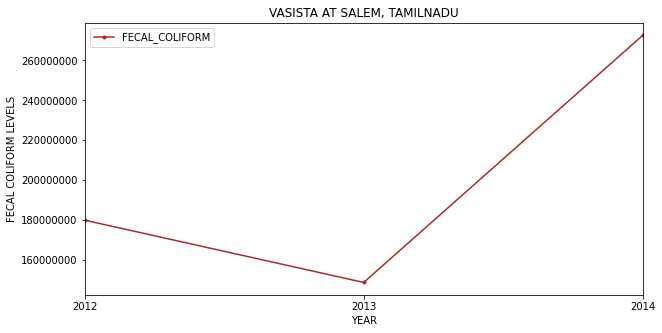

In [ ]:
fecal_levels_over_years['YEAR'] = pd.to_datetime(fecal_levels_over_years['YEAR'], format='%Y')
fecal_levels_over_years.plot( x = "YEAR", kind="line", style='.-', figsize = (10,5), legend = True, color='brown')
plt.ticklabel_format(style="plain", axis="y")
plt.xlabel("YEAR")
plt.ylabel("FECAL COLIFORM LEVELS")
plt.title("VASISTA AT SALEM, TAMILNADU")
plt.show()



**Lastly, we can determine the pollution levels of the water bodies by analyzing the conductivity levels. The causes of high conductivity is the presence inorganic dissolved solids such as chloride, nitrate, sulfate phosphate anions, etc. Thus by exploiting the water bodies as chemical dumps, human activity plays a key pollutant.**

**According to the United States Environmental Agency, any water body with conductivity levels higher than 10,000 is evident that it is industrial waters with high level of human contamination**

In [ ]:
df3 = df[["LOCATIONS","STATE","CONDUCTIVITY"]]

,LOCATIONS,STATE,CONDUCTIVITY
0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,189
1,ZUARI AT PANCHAWADI,GOA,179
2,RIVER ZUARI AT BORIM BRIDGE,GOA,64
3,RIVER ZUARI AT MARCAIM JETTY,GOA,83
4,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,81
...,...,...,...
888,RIVER KAVERI ON BRIDGE AT BILLIMORANANVALSAD ROAD,GUJARAT,26600
889,RIVER DHADAR AT KOTHADA,GUJARAT,938
890,"AMBIKA AT BILIMORA,",GUJARAT,7778
891,"MINDHOLA AT STATE HIGHWAY BRIDGE SACHIN,",GUJARAT,885


In [ ]:
conductivity = df3.loc[df3["CONDUCTIVITY"] > 10000]
conductivity_group1 = conductivity.groupby("STATE", sort=True)['CONDUCTIVITY'].count()
conductivity_group1

STATE
DAMAN & DIU                        1
DAMAN, DIU, DADRA NAGAR HAVELI     1
GUJARAT                            4
KERALA                            34
MAHARASHTRA                        9
ODISHA                             1
ORISSA                             3
PONDICHERRY                        2
Name: CONDUCTIVITY, dtype: int64

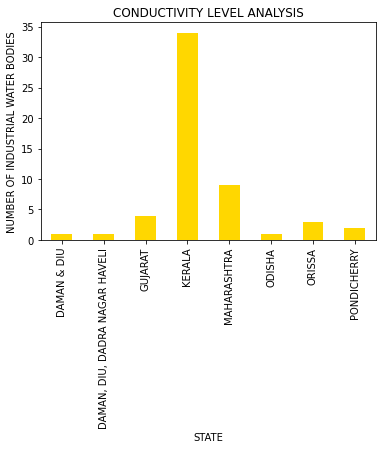

In [ ]:
bar_graph2=conductivity_group1.plot(kind='bar',title='CONDUCTIVITY LEVEL ANALYSIS',xlabel='STATE',ylabel='NUMBER OF INDUSTRIAL WATER BODIES',color='GOLD')

**Kerala has the most industrial water bodies in India. With about 34 water bodies with high conductivity levels (more than 10,000), it is evident that the industrial plants present are polluting and encroaching in the aquatic habits surrounding.**

In [ ]:
conductivity_group2 = conductivity.groupby("STATE", sort=True)['CONDUCTIVITY'].mean().round(1)
conductivity_group2

STATE
DAMAN & DIU                       15608.0
DAMAN, DIU, DADRA NAGAR HAVELI    23576.0
GUJARAT                           23707.2
KERALA                            17958.9
MAHARASHTRA                       21525.4
ODISHA                            25034.0
ORISSA                            20306.7
PONDICHERRY                       27885.0
Name: CONDUCTIVITY, dtype: float64

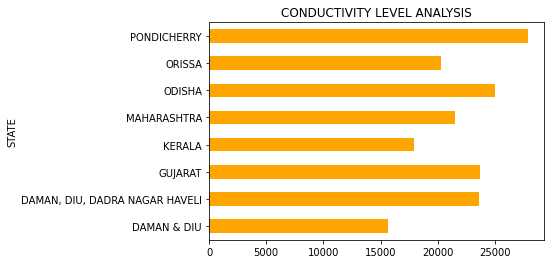

In [ ]:
bar_graph3=conductivity_group2.plot(kind='barh',title='CONDUCTIVITY LEVEL ANALYSIS',xlabel='STATE',ylabel=' AVERAGE CONDUCTIVITY LEVELS',color='ORANGE')

**We can conclude this conductivity analysis by determining that Pondicherry has the highest average conductivity levels in its water bodies among all the other states. (23,885 µmhos/cm)**